In [18]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Train_Data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
columns_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'GarageYrBlt']

In [4]:
data_clean = data.drop(columns_to_drop,axis=1)

In [5]:
pd.set_option('display.max_columns', None)
data_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
le = LabelEncoder()
for col_name in data_clean.columns:
#     if data_clean.dtypes[col_name] == object:
#         print(col_name, data_clean.dtypes[col_name])
#         data_clean[col_name] = le.fit_transform(data_clean[col_name]) 
    if data_clean[col_name].isnull().values.any() == True:
        print(col_name)
        data_clean = data_clean.fillna(data_clean[col_name].mean())

LotFrontage


In [8]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1100 non-null   int64  
 1   MSZoning       1100 non-null   int32  
 2   LotFrontage    1100 non-null   float64
 3   LotArea        1100 non-null   int64  
 4   Street         1100 non-null   int32  
 5   LotShape       1100 non-null   int32  
 6   LandContour    1100 non-null   int32  
 7   Utilities      1100 non-null   int32  
 8   LotConfig      1100 non-null   int32  
 9   LandSlope      1100 non-null   int32  
 10  Neighborhood   1100 non-null   int32  
 11  Condition1     1100 non-null   int32  
 12  Condition2     1100 non-null   int32  
 13  BldgType       1100 non-null   int32  
 14  HouseStyle     1100 non-null   int32  
 15  OverallQual    1100 non-null   int64  
 16  OverallCond    1100 non-null   int64  
 17  YearBuilt      1100 non-null   int64  
 18  YearRemo

### Data Cleaned Hurray!!!

In [9]:
trainY = data_clean['SalePrice']

In [10]:
trainX = data_clean.drop(columns=['SalePrice'])

In [11]:
X = trainX.values
Y = trainY.values

In [12]:
print(X.shape, Y.shape)

(1100, 73) (1100,)


In [13]:
from keras import models
from keras.layers import Dense

In [14]:
model=models.Sequential()

In [15]:
model.add(Dense(1100,activation='relu',input_shape= (73,)))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.summary()

In [16]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [17]:
hist=model.fit(X,Y,batch_size=128,epochs=1000,validation_split=0.2)

Epoch 1/1000
7/7 [==============================] - 4s 329ms/step - loss: 38348825600.0000 - mae: 179357.8828 - val_loss: 32261171200.0000 - val_mae: 164713.8438
Epoch 2/1000
7/7 [==============================] - 0s 24ms/step - loss: 32739146752.0000 - mae: 163528.2070 - val_loss: 15846037504.0000 - val_mae: 107078.3281
Epoch 3/1000
7/7 [==============================] - 0s 18ms/step - loss: 19020751872.0000 - mae: 92679.6338 - val_loss: 5194835968.0000 - val_mae: 49468.3359
Epoch 4/1000
7/7 [==============================] - 0s 21ms/step - loss: 10431571520.0000 - mae: 56340.8306 - val_loss: 4131515648.0000 - val_mae: 42243.2422
Epoch 5/1000
7/7 [==============================] - 0s 21ms/step - loss: 9280998720.0000 - mae: 51305.1011 - val_loss: 3821720576.0000 - val_mae: 39825.6992
Epoch 6/1000
7/7 [==============================] - 0s 21ms/step - loss: 4882933184.0000 - mae: 43111.0610 - val_loss: 3308071424.0000 - val_mae: 42447.5391
Epoch 7/1000
7/7 [=============================

7/7 [==============================] - 0s 46ms/step - loss: 1427393744.0000 - mae: 25391.1526 - val_loss: 1601555072.0000 - val_mae: 27319.3320
Epoch 53/1000
7/7 [==============================] - 0s 32ms/step - loss: 1439692304.0000 - mae: 25281.9885 - val_loss: 1610214144.0000 - val_mae: 27049.0273
Epoch 54/1000
7/7 [==============================] - 0s 24ms/step - loss: 1412820608.0000 - mae: 25222.0664 - val_loss: 1595597568.0000 - val_mae: 26969.0273
Epoch 55/1000
7/7 [==============================] - 0s 29ms/step - loss: 1271469752.0000 - mae: 23651.3660 - val_loss: 1613055104.0000 - val_mae: 27059.0410
Epoch 56/1000
7/7 [==============================] - 0s 32ms/step - loss: 1310013424.0000 - mae: 24557.9539 - val_loss: 1577686016.0000 - val_mae: 26823.5723
Epoch 57/1000
7/7 [==============================] - 0s 43ms/step - loss: 1746144576.0000 - mae: 25371.7122 - val_loss: 1647101184.0000 - val_mae: 27427.5723
Epoch 58/1000
7/7 [==============================] - 0s 31ms/step 

Epoch 104/1000
7/7 [==============================] - 0s 27ms/step - loss: 1511286512.0000 - mae: 24515.4246 - val_loss: 1490829952.0000 - val_mae: 25657.9023
Epoch 105/1000
7/7 [==============================] - 0s 25ms/step - loss: 1340801512.0000 - mae: 23111.2373 - val_loss: 1519350784.0000 - val_mae: 25868.3008
Epoch 106/1000
7/7 [==============================] - 0s 31ms/step - loss: 1542591360.0000 - mae: 23950.9717 - val_loss: 1557410048.0000 - val_mae: 26421.0371
Epoch 107/1000
7/7 [==============================] - 0s 25ms/step - loss: 1599146720.0000 - mae: 24302.6409 - val_loss: 1532303232.0000 - val_mae: 26090.7910
Epoch 108/1000
7/7 [==============================] - 0s 25ms/step - loss: 1336681776.0000 - mae: 23862.5378 - val_loss: 1485449344.0000 - val_mae: 25573.9355
Epoch 109/1000
7/7 [==============================] - 0s 29ms/step - loss: 1240610432.0000 - mae: 23388.3000 - val_loss: 1508682240.0000 - val_mae: 26060.5273
Epoch 110/1000
7/7 [==========================

7/7 [==============================] - 0s 22ms/step - loss: 1212345704.0000 - mae: 22823.7861 - val_loss: 1433615104.0000 - val_mae: 25202.9043
Epoch 156/1000
7/7 [==============================] - 0s 22ms/step - loss: 1087778560.0000 - mae: 22227.0261 - val_loss: 1423989248.0000 - val_mae: 25102.4355
Epoch 157/1000
7/7 [==============================] - 0s 30ms/step - loss: 1201368024.0000 - mae: 22115.5742 - val_loss: 1395294208.0000 - val_mae: 24576.0996
Epoch 158/1000
7/7 [==============================] - 0s 23ms/step - loss: 1081575616.0000 - mae: 21962.9377 - val_loss: 1384322560.0000 - val_mae: 24538.5918
Epoch 159/1000
7/7 [==============================] - 0s 24ms/step - loss: 1297395968.0000 - mae: 22982.1218 - val_loss: 1625298432.0000 - val_mae: 27705.1133
Epoch 160/1000
7/7 [==============================] - 0s 27ms/step - loss: 1557366288.0000 - mae: 24027.0911 - val_loss: 1757400576.0000 - val_mae: 29404.9316
Epoch 161/1000
7/7 [==============================] - 0s 24ms

7/7 [==============================] - 0s 26ms/step - loss: 1056014296.0000 - mae: 21600.5474 - val_loss: 1349258752.0000 - val_mae: 24338.5918
Epoch 207/1000
7/7 [==============================] - 0s 29ms/step - loss: 1286306000.0000 - mae: 21879.5669 - val_loss: 1325356928.0000 - val_mae: 24121.6641
Epoch 208/1000
7/7 [==============================] - 0s 24ms/step - loss: 1083299304.0000 - mae: 20772.7659 - val_loss: 1325401984.0000 - val_mae: 24138.6855
Epoch 209/1000
7/7 [==============================] - 0s 23ms/step - loss: 1100547344.0000 - mae: 21562.0750 - val_loss: 1389604352.0000 - val_mae: 24961.5137
Epoch 210/1000
7/7 [==============================] - 0s 31ms/step - loss: 984889264.0000 - mae: 20740.3425 - val_loss: 1339085440.0000 - val_mae: 24370.6641
Epoch 211/1000
7/7 [==============================] - 0s 24ms/step - loss: 1341215568.0000 - mae: 22761.6047 - val_loss: 1318604544.0000 - val_mae: 23857.3633
Epoch 212/1000
7/7 [==============================] - 0s 24ms/

Epoch 258/1000
7/7 [==============================] - 0s 24ms/step - loss: 1067394280.0000 - mae: 21476.1216 - val_loss: 1338411904.0000 - val_mae: 24634.1914
Epoch 259/1000
7/7 [==============================] - 0s 24ms/step - loss: 952930320.0000 - mae: 20502.0864 - val_loss: 1231002496.0000 - val_mae: 23215.3984
Epoch 260/1000
7/7 [==============================] - 0s 28ms/step - loss: 840595616.0000 - mae: 19387.3665 - val_loss: 1244039168.0000 - val_mae: 23323.1406
Epoch 261/1000
7/7 [==============================] - 0s 23ms/step - loss: 870780296.0000 - mae: 19736.7603 - val_loss: 1232683008.0000 - val_mae: 23252.0996
Epoch 262/1000
7/7 [==============================] - 0s 21ms/step - loss: 1026897040.0000 - mae: 21291.9475 - val_loss: 1191695360.0000 - val_mae: 22612.6680
Epoch 263/1000
7/7 [==============================] - 0s 29ms/step - loss: 971646540.0000 - mae: 20967.5974 - val_loss: 1380151552.0000 - val_mae: 25173.9551
Epoch 264/1000
7/7 [==============================

Epoch 310/1000
7/7 [==============================] - 0s 24ms/step - loss: 790501152.0000 - mae: 18353.9265 - val_loss: 1086784384.0000 - val_mae: 21440.7949
Epoch 311/1000
7/7 [==============================] - 0s 24ms/step - loss: 765158816.0000 - mae: 18808.8572 - val_loss: 1134515328.0000 - val_mae: 22024.8438
Epoch 312/1000
7/7 [==============================] - 0s 24ms/step - loss: 746317080.0000 - mae: 18517.4685 - val_loss: 1100652544.0000 - val_mae: 21391.1191
Epoch 313/1000
7/7 [==============================] - 0s 28ms/step - loss: 682699384.0000 - mae: 17854.5405 - val_loss: 1169686912.0000 - val_mae: 22784.4043
Epoch 314/1000
7/7 [==============================] - 0s 24ms/step - loss: 797727336.0000 - mae: 19154.3828 - val_loss: 1077442816.0000 - val_mae: 21081.8008
Epoch 315/1000
7/7 [==============================] - 0s 29ms/step - loss: 815315072.0000 - mae: 18605.8506 - val_loss: 1075309440.0000 - val_mae: 20907.6152
Epoch 316/1000
7/7 [==============================] 

Epoch 362/1000
7/7 [==============================] - 0s 30ms/step - loss: 628421732.0000 - mae: 17698.1062 - val_loss: 971900352.0000 - val_mae: 20570.2617
Epoch 363/1000
7/7 [==============================] - 0s 24ms/step - loss: 548832100.0000 - mae: 16877.8611 - val_loss: 1050490624.0000 - val_mae: 21587.5703
Epoch 364/1000
7/7 [==============================] - 0s 23ms/step - loss: 555386204.0000 - mae: 16961.7908 - val_loss: 1000297856.0000 - val_mae: 20800.6211
Epoch 365/1000
7/7 [==============================] - 0s 24ms/step - loss: 541553296.0000 - mae: 16510.5969 - val_loss: 964485760.0000 - val_mae: 20021.8438
Epoch 366/1000
7/7 [==============================] - 0s 29ms/step - loss: 612628032.0000 - mae: 18327.3577 - val_loss: 981655680.0000 - val_mae: 20221.1953
Epoch 367/1000
7/7 [==============================] - 0s 22ms/step - loss: 539766384.0000 - mae: 16714.5980 - val_loss: 958276480.0000 - val_mae: 20027.4746
Epoch 368/1000
7/7 [==============================] - 0s

7/7 [==============================] - 0s 21ms/step - loss: 631115448.0000 - mae: 18061.0457 - val_loss: 933102656.0000 - val_mae: 20094.3887
Epoch 415/1000
7/7 [==============================] - 0s 28ms/step - loss: 478446484.0000 - mae: 16025.1726 - val_loss: 969880064.0000 - val_mae: 21032.5430
Epoch 416/1000
7/7 [==============================] - 0s 25ms/step - loss: 539979692.0000 - mae: 16795.1526 - val_loss: 891397184.0000 - val_mae: 19651.2070
Epoch 417/1000
7/7 [==============================] - 0s 24ms/step - loss: 477107528.0000 - mae: 15329.7859 - val_loss: 909851392.0000 - val_mae: 20375.9707
Epoch 418/1000
7/7 [==============================] - 0s 27ms/step - loss: 501013408.0000 - mae: 15667.7214 - val_loss: 952832960.0000 - val_mae: 21108.5918
Epoch 419/1000
7/7 [==============================] - 0s 23ms/step - loss: 455160384.0000 - mae: 15062.5934 - val_loss: 862135168.0000 - val_mae: 19371.7168
Epoch 420/1000
7/7 [==============================] - 0s 24ms/step - loss

7/7 [==============================] - 0s 26ms/step - loss: 507468288.0000 - mae: 16035.4391 - val_loss: 852003008.0000 - val_mae: 19046.3242
Epoch 467/1000
7/7 [==============================] - 0s 24ms/step - loss: 469405164.0000 - mae: 15299.2867 - val_loss: 802672256.0000 - val_mae: 18857.8438
Epoch 468/1000
7/7 [==============================] - 0s 25ms/step - loss: 348063810.0000 - mae: 13816.1777 - val_loss: 817023744.0000 - val_mae: 18882.2344
Epoch 469/1000
7/7 [==============================] - 0s 29ms/step - loss: 379449852.0000 - mae: 14062.9763 - val_loss: 901679808.0000 - val_mae: 21143.1582
Epoch 470/1000
7/7 [==============================] - 0s 25ms/step - loss: 388526232.0000 - mae: 14396.5223 - val_loss: 855771200.0000 - val_mae: 19446.4766
Epoch 471/1000
7/7 [==============================] - 0s 27ms/step - loss: 376913260.0000 - mae: 14394.3505 - val_loss: 850342720.0000 - val_mae: 20100.8477
Epoch 472/1000
7/7 [==============================] - 0s 23ms/step - loss

7/7 [==============================] - 0s 27ms/step - loss: 400492520.0000 - mae: 14203.0298 - val_loss: 875448192.0000 - val_mae: 19534.4727
Epoch 519/1000
7/7 [==============================] - 0s 35ms/step - loss: 432151140.0000 - mae: 15740.8552 - val_loss: 831073856.0000 - val_mae: 20237.1309
Epoch 520/1000
7/7 [==============================] - 0s 20ms/step - loss: 337430332.0000 - mae: 13117.3615 - val_loss: 801108992.0000 - val_mae: 19627.5918
Epoch 521/1000
7/7 [==============================] - 0s 30ms/step - loss: 321591104.0000 - mae: 12640.0481 - val_loss: 787894784.0000 - val_mae: 19328.2520
Epoch 522/1000
7/7 [==============================] - 0s 24ms/step - loss: 295649576.0000 - mae: 12481.2053 - val_loss: 767930688.0000 - val_mae: 18892.6973
Epoch 523/1000
7/7 [==============================] - 0s 23ms/step - loss: 317001936.0000 - mae: 12829.3116 - val_loss: 770669248.0000 - val_mae: 18898.0684
Epoch 524/1000
7/7 [==============================] - 0s 27ms/step - loss

7/7 [==============================] - 0s 25ms/step - loss: 266923190.0000 - mae: 11630.7261 - val_loss: 721723776.0000 - val_mae: 18125.5020
Epoch 571/1000
7/7 [==============================] - 0s 28ms/step - loss: 300452404.0000 - mae: 12935.0723 - val_loss: 757499968.0000 - val_mae: 19521.7949
Epoch 572/1000
7/7 [==============================] - 0s 24ms/step - loss: 298732072.0000 - mae: 12600.4917 - val_loss: 751824064.0000 - val_mae: 18365.3770
Epoch 573/1000
7/7 [==============================] - 0s 23ms/step - loss: 292639840.0000 - mae: 12541.6628 - val_loss: 740504192.0000 - val_mae: 19221.6719
Epoch 574/1000
7/7 [==============================] - ETA: 0s - loss: 295193733.3333 - mae: 12315.176 - 0s 28ms/step - loss: 289847164.0000 - mae: 12246.5492 - val_loss: 722044672.0000 - val_mae: 18636.7363
Epoch 575/1000
7/7 [==============================] - 0s 30ms/step - loss: 253497440.0000 - mae: 12113.0048 - val_loss: 881708544.0000 - val_mae: 21903.6387
Epoch 576/1000
7/7 [===

Epoch 622/1000
7/7 [==============================] - 0s 26ms/step - loss: 205911450.0000 - mae: 10700.7268 - val_loss: 698815872.0000 - val_mae: 18501.5996
Epoch 623/1000
7/7 [==============================] - 0s 21ms/step - loss: 286829360.0000 - mae: 12013.9637 - val_loss: 849367616.0000 - val_mae: 19425.0176
Epoch 624/1000
7/7 [==============================] - 0s 24ms/step - loss: 326486848.0000 - mae: 13837.4116 - val_loss: 854216896.0000 - val_mae: 21665.4590
Epoch 625/1000
7/7 [==============================] - 0s 30ms/step - loss: 311319648.0000 - mae: 13045.9214 - val_loss: 699696896.0000 - val_mae: 18300.5781
Epoch 626/1000
7/7 [==============================] - 0s 25ms/step - loss: 234704820.0000 - mae: 11456.0596 - val_loss: 676679488.0000 - val_mae: 18272.0156
Epoch 627/1000
7/7 [==============================] - 0s 27ms/step - loss: 222492318.0000 - mae: 10929.3444 - val_loss: 718869312.0000 - val_mae: 19166.2383
Epoch 628/1000
7/7 [==============================] - 0s 2

Epoch 674/1000
7/7 [==============================] - 0s 24ms/step - loss: 212918284.0000 - mae: 10266.8071 - val_loss: 699463424.0000 - val_mae: 18795.2012
Epoch 675/1000
7/7 [==============================] - 0s 24ms/step - loss: 189011896.0000 - mae: 10228.2755 - val_loss: 684778048.0000 - val_mae: 18342.3652
Epoch 676/1000
7/7 [==============================] - 0s 25ms/step - loss: 201103586.0000 - mae: 10238.6143 - val_loss: 712401536.0000 - val_mae: 18562.4805
Epoch 677/1000
7/7 [==============================] - 0s 33ms/step - loss: 183072052.0000 - mae: 9965.5219 - val_loss: 677826112.0000 - val_mae: 18223.3105
Epoch 678/1000
7/7 [==============================] - 0s 25ms/step - loss: 204531880.0000 - mae: 10440.1011 - val_loss: 688815104.0000 - val_mae: 18433.2598
Epoch 679/1000
7/7 [==============================] - 0s 28ms/step - loss: 206921676.0000 - mae: 10638.4006 - val_loss: 680330752.0000 - val_mae: 18116.3613
Epoch 680/1000
7/7 [==============================] - 0s 22

7/7 [==============================] - 0s 23ms/step - loss: 275179920.0000 - mae: 11591.3872 - val_loss: 670591104.0000 - val_mae: 18134.3457
Epoch 727/1000
7/7 [==============================] - 0s 21ms/step - loss: 243083278.0000 - mae: 10876.1328 - val_loss: 663615616.0000 - val_mae: 17604.3223
Epoch 728/1000
7/7 [==============================] - 0s 25ms/step - loss: 204901746.0000 - mae: 10178.9722 - val_loss: 684396352.0000 - val_mae: 18654.0039
Epoch 729/1000
7/7 [==============================] - 0s 24ms/step - loss: 211901754.0000 - mae: 10284.3590 - val_loss: 683175744.0000 - val_mae: 18210.6504
Epoch 730/1000
7/7 [==============================] - 0s 33ms/step - loss: 174257758.0000 - mae: 9956.6572 - val_loss: 774231552.0000 - val_mae: 20418.0645
Epoch 731/1000
7/7 [==============================] - 0s 29ms/step - loss: 186426438.0000 - mae: 10386.3851 - val_loss: 669839296.0000 - val_mae: 18008.8145
Epoch 732/1000
7/7 [==============================] - 0s 25ms/step - loss:

7/7 [==============================] - 0s 24ms/step - loss: 153529628.0000 - mae: 9015.3096 - val_loss: 699473152.0000 - val_mae: 18973.3633
Epoch 779/1000
7/7 [==============================] - 0s 24ms/step - loss: 157048502.0000 - mae: 9376.0145 - val_loss: 701867712.0000 - val_mae: 19118.2910
Epoch 780/1000
7/7 [==============================] - 0s 24ms/step - loss: 130231661.0000 - mae: 8584.3217 - val_loss: 666694976.0000 - val_mae: 18136.8320
Epoch 781/1000
7/7 [==============================] - 0s 24ms/step - loss: 129430994.0000 - mae: 8507.5776 - val_loss: 731506816.0000 - val_mae: 19873.9395
Epoch 782/1000
7/7 [==============================] - 0s 26ms/step - loss: 168799280.0000 - mae: 9336.5358 - val_loss: 671227968.0000 - val_mae: 18453.2754
Epoch 783/1000
7/7 [==============================] - 0s 32ms/step - loss: 139562366.0000 - mae: 8822.4651 - val_loss: 678720960.0000 - val_mae: 18370.1934
Epoch 784/1000
7/7 [==============================] - 0s 22ms/step - loss: 1815

7/7 [==============================] - ETA: 0s - loss: 125751470.4000 - mae: 8039.42 - 0s 27ms/step - loss: 127486299.0000 - mae: 8143.6565 - val_loss: 689616192.0000 - val_mae: 18671.6270
Epoch 831/1000
7/7 [==============================] - 0s 23ms/step - loss: 146085664.0000 - mae: 8688.1290 - val_loss: 694457600.0000 - val_mae: 18755.9961
Epoch 832/1000
7/7 [==============================] - 0s 23ms/step - loss: 137855898.0000 - mae: 8428.4797 - val_loss: 696769216.0000 - val_mae: 18976.8789
Epoch 833/1000
7/7 [==============================] - 0s 24ms/step - loss: 125814511.0000 - mae: 8090.7476 - val_loss: 665968768.0000 - val_mae: 18236.1406
Epoch 834/1000
7/7 [==============================] - 0s 24ms/step - loss: 113837021.0000 - mae: 7890.7266 - val_loss: 719980608.0000 - val_mae: 19214.8633
Epoch 835/1000
7/7 [==============================] - 0s 23ms/step - loss: 126110133.0000 - mae: 8397.3278 - val_loss: 692753664.0000 - val_mae: 18804.2363
Epoch 836/1000
7/7 [===========

7/7 [==============================] - 0s 25ms/step - loss: 150287327.0000 - mae: 9195.3142 - val_loss: 731041408.0000 - val_mae: 19560.9473
Epoch 883/1000
7/7 [==============================] - 0s 37ms/step - loss: 192194928.0000 - mae: 10492.9067 - val_loss: 746767232.0000 - val_mae: 19319.6855
Epoch 884/1000
7/7 [==============================] - 0s 24ms/step - loss: 148640292.0000 - mae: 9213.6584 - val_loss: 677294272.0000 - val_mae: 18163.9180
Epoch 885/1000
7/7 [==============================] - 0s 24ms/step - loss: 113332011.0000 - mae: 8069.8624 - val_loss: 692439552.0000 - val_mae: 18280.3516
Epoch 886/1000
7/7 [==============================] - 0s 24ms/step - loss: 125894213.0000 - mae: 8614.1819 - val_loss: 694222528.0000 - val_mae: 18252.1270
Epoch 887/1000
7/7 [==============================] - 0s 24ms/step - loss: 123116718.0000 - mae: 8307.6396 - val_loss: 681409088.0000 - val_mae: 18297.6367
Epoch 888/1000
7/7 [==============================] - 0s 26ms/step - loss: 117

7/7 [==============================] - 0s 25ms/step - loss: 106742138.0000 - mae: 7556.4201 - val_loss: 692311360.0000 - val_mae: 18497.6191
Epoch 935/1000
7/7 [==============================] - 0s 24ms/step - loss: 102500985.0000 - mae: 7637.1757 - val_loss: 708791488.0000 - val_mae: 18444.8906
Epoch 936/1000
7/7 [==============================] - 0s 33ms/step - loss: 100623874.0000 - mae: 7601.8712 - val_loss: 697428480.0000 - val_mae: 18321.4746
Epoch 937/1000
7/7 [==============================] - 0s 21ms/step - loss: 105471401.0000 - mae: 7623.9467 - val_loss: 686282240.0000 - val_mae: 18415.9453
Epoch 938/1000
7/7 [==============================] - 0s 25ms/step - loss: 115015759.0000 - mae: 8082.1100 - val_loss: 681628544.0000 - val_mae: 18381.5254
Epoch 939/1000
7/7 [==============================] - 0s 24ms/step - loss: 90992215.0000 - mae: 7043.8193 - val_loss: 749308864.0000 - val_mae: 19535.8281
Epoch 940/1000
7/7 [==============================] - 0s 25ms/step - loss: 11377

Epoch 987/1000
7/7 [==============================] - 0s 28ms/step - loss: 89315070.0000 - mae: 6888.6904 - val_loss: 709250752.0000 - val_mae: 18612.9414
Epoch 988/1000
7/7 [==============================] - 0s 27ms/step - loss: 84029292.5000 - mae: 6713.6165 - val_loss: 717914432.0000 - val_mae: 18871.3066
Epoch 989/1000
7/7 [==============================] - 0s 28ms/step - loss: 93462965.0000 - mae: 6806.6550 - val_loss: 714772864.0000 - val_mae: 18564.9961
Epoch 990/1000
7/7 [==============================] - 0s 24ms/step - loss: 92327914.0000 - mae: 7249.0689 - val_loss: 806662080.0000 - val_mae: 19638.7617
Epoch 991/1000
7/7 [==============================] - 0s 25ms/step - loss: 162342016.0000 - mae: 9991.5302 - val_loss: 754956544.0000 - val_mae: 19037.7051
Epoch 992/1000
7/7 [==============================] - 0s 24ms/step - loss: 132203425.0000 - mae: 8806.2585 - val_loss: 698700736.0000 - val_mae: 18471.9473
Epoch 993/1000
7/7 [==============================] - 0s 29ms/step -

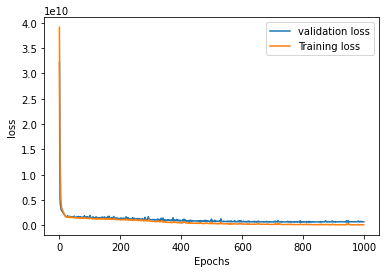

In [19]:
h=hist.history
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

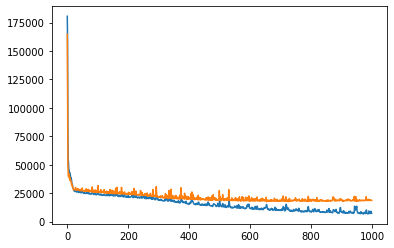

In [20]:
plt.plot(h['mae'])
plt.plot(h['val_mae'])
plt.show()

## Loading test data

In [22]:
data1 = pd.read_csv('Test_Data.csv')
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1971,1971,Gable,CompShg,HdBoard,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,412,LwQ,287,251,950,GasA,TA,Y,SBrkr,950,0,0,950,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1981.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1960,2002,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,45.0,TA,TA,CBlock,TA,TA,No,Rec,588,Unf,0,422,1010,GasA,Ex,Y,SBrkr,1134,0,0,1134,0,0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1960.0,RFn,1,254,TA,TA,Y,0,16,0,0,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,655,Unf,0,0,655,GasA,Ex,Y,SBrkr,1194,0,0,1194,0,1,1,0,3,1,TA,6,Typ,1,Fa,BuiltIn,1954.0,Fin,2,539,TA,TA,Y,0,0,192,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,304.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,630,630,GasA,TA,Y,SBrkr,630,672,0,1302,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1970.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [23]:
data_clean1 = data1.drop(columns_to_drop,axis=1)

In [26]:
le = LabelEncoder()
for col_name in data_clean1.columns:
#     if data_clean1.dtypes[col_name] == object:
#         data_clean1[col_name] = le.fit_transform(data_clean1[col_name]) 
    if data_clean1[col_name].isnull().values.any() == True:
        print(col_name)
        data_clean1 = data_clean1.fillna(data_clean1[col_name].mean())

LotFrontage


In [27]:
x_test = data_clean1.values

In [28]:
y_predicted=model.predict(x_test)

In [31]:
y_predicted.shape

(360,)

In [30]:
y_predicted=y_predicted.reshape((360,))

In [32]:
labels=np.arange(1101,1461)

In [33]:
df=pd.DataFrame({'Id':labels,'SalePrice':y_predicted})

In [35]:
df.to_csv('res.csv',index=False)
